In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input/diabetes-prediction-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
data = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
data.shape

(100000, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
print(data.duplicated().any())

True


In [9]:
data = data.drop_duplicates()

In [10]:
print(data.duplicated().any())

False


In [11]:
data.shape

(96146, 9)

In [12]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [13]:
cate_val

['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

In [14]:
cont_val

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [15]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [16]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [17]:
data['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor

In [19]:
X = data.drop('diabetes',axis=1)
y = data['diabetes']

In [20]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['gender'])
X = encoder.fit_transform(X)
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1,80.0,0,1,never,25.19,6.6,140
1,1,54.0,0,0,No Info,27.32,6.6,80
2,2,28.0,0,0,never,27.32,5.7,158
3,1,36.0,0,0,current,23.45,5.0,155
4,2,76.0,1,1,current,20.14,4.8,155


In [21]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['smoking_history'])
X = encoder.fit_transform(X)
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1,80.0,0,1,1,25.19,6.6,140
1,1,54.0,0,0,2,27.32,6.6,80
2,2,28.0,0,0,1,27.32,5.7,158
3,1,36.0,0,0,3,23.45,5.0,155
4,2,76.0,1,1,3,20.14,4.8,155


In [22]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [23]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

method_names = []
method_scores = []



diabetes
0    87664
1     8482
Name: count, dtype: int64


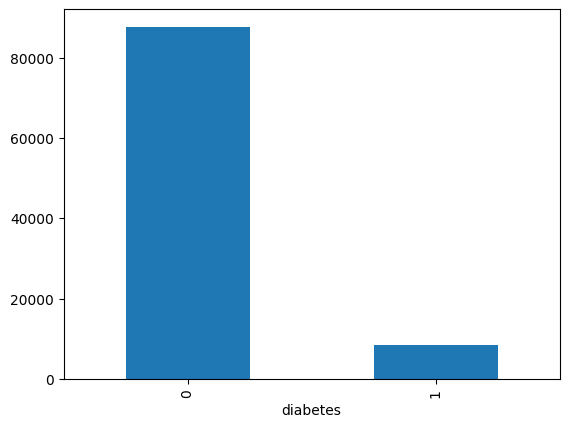

In [25]:
print(data.diabetes.value_counts())
p=data.diabetes.value_counts().plot(kind="bar")

SVM Test Accuracy 0.948101924076963


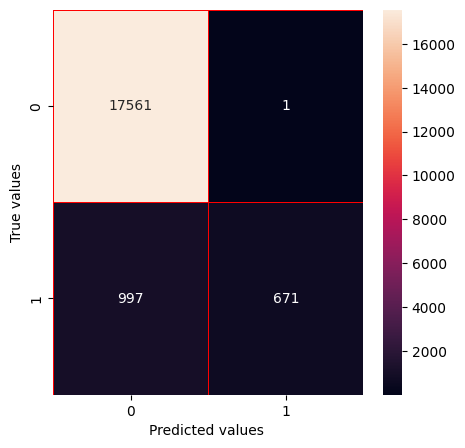

In [26]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

print("SVM Test Accuracy {}".format(svm.score(X_test, y_test)))
method_names.append("svm")
method_scores.append(svm.score(X_test, y_test))

y_pred1 = svm.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel("Predicted values ")
plt.ylabel("True values")
plt.show()

Decision Tree Test Accuracy 0.9481539261570463


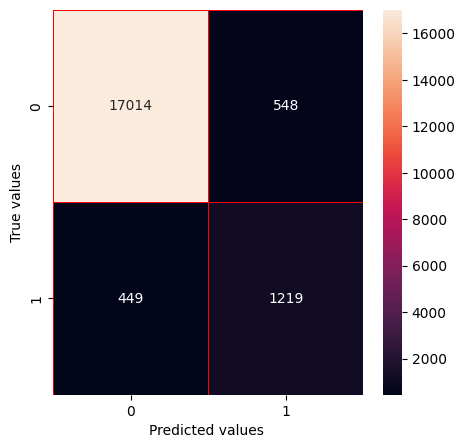

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

print("Decision Tree Test Accuracy {}".format(dt.score(X_test, y_test)))
method_names.append("Decision Tree")
method_scores.append(dt.score(X_test, y_test))

y_pred2 = dt.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel("Predicted values ")
plt.ylabel("True values")
plt.show()

Random Forest Classifier Test Accuracy 0.9692667706708268


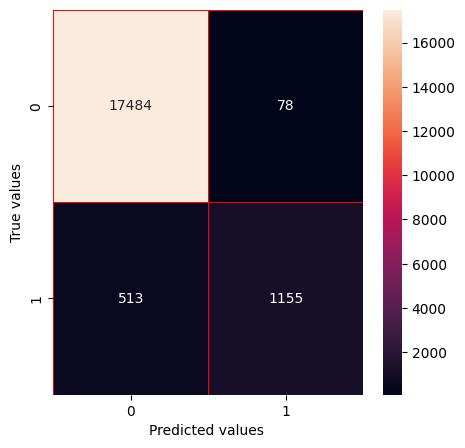

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

print("Random Forest Classifier Test Accuracy {}".format(rf.score(X_test, y_test)))
method_names.append("RFC")
method_scores.append(rf.score(X_test, y_test))

y_pred3 = rf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel("Predicted values ")
plt.ylabel("True values")
plt.show()

Logistic Regression Test Accuracy 0.952678107124285


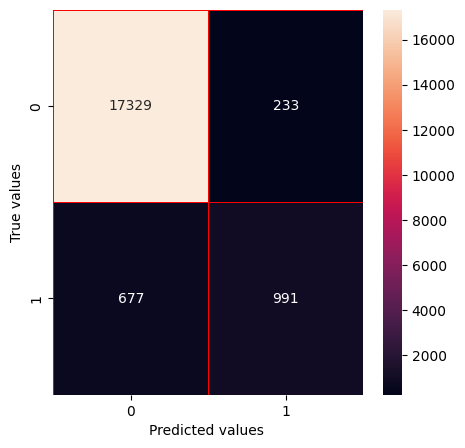

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

print("Logistic Regression Test Accuracy {}".format(lr.score(X_test, y_test)))
method_names.append("LogR")
method_scores.append(lr.score(X_test, y_test))

y_pred4 = lr.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel("Predicted values ")
plt.ylabel("True values")
plt.show()

In [30]:
final_data = pd.DataFrame({'Models':['SVM','DT','RF','LogR'],
                          'Accuracy':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100, accuracy_score(y_test,y_pred4)*100]})

In [31]:
final_data

,Models,Accuracy
0,SVM,94.810192
1,DT,94.815393
2,RF,96.926677
3,LogR,95.267811
